In [78]:
import pandas as pd

data = pd.read_csv(r'C:\Users\sreej\OneDrive\Documents\Northeastern - Analytics\ALY 6020 Predictive Analysis\Nashville_housing_mod4.csv')

# Display the first few rows of the dataset
print(data.head())

   Unnamed: 0        Parcel ID       Land Use   Property Address  \
0           1  105 11 0 080.00  SINGLE FAMILY   1802  STEWART PL   
1           2  118 03 0 130.00  SINGLE FAMILY  2761  ROSEDALE PL   
2           3  119 01 0 479.00  SINGLE FAMILY  224  PEACHTREE ST   
3           4  119 05 0 186.00  SINGLE FAMILY      316  LUTIE ST   
4           5  119 05 0 387.00  SINGLE FAMILY   2626  FOSTER AVE   

   Suite/ Condo   # Property City  Sale Date   Legal Reference Sold As Vacant  \
0               NaN     NASHVILLE  1/11/2013  20130118-0006337             No   
1               NaN     NASHVILLE  1/18/2013  20130124-0008033             No   
2               NaN     NASHVILLE  1/18/2013  20130128-0008863             No   
3               NaN     NASHVILLE  1/23/2013  20130131-0009929             No   
4               NaN     NASHVILLE   1/4/2013  20130118-0006110             No   

  Multiple Parcels Involved in Sale  ... Building Value Finished Area  \
0                              

In [79]:
# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0', 'Parcel ID', 'Legal Reference' , 'Suite/ Condo   #']
data = data.drop(columns=columns_to_drop)

In [80]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Convert 'Sale Date' to datetime
data['Sale Date'] = pd.to_datetime(data['Sale Date'], errors='coerce')



Missing Values:
 Land Use                               0
Property Address                       2
Property City                          2
Sale Date                              0
Sold As Vacant                         0
Multiple Parcels Involved in Sale      0
City                                   0
State                                  0
Acreage                                0
Tax District                           0
Neighborhood                           0
Land Value                             0
Building Value                         0
Finished Area                          1
Foundation Type                        1
Year Built                             0
Exterior Wall                          0
Grade                                  0
Bedrooms                               3
Full Bath                              1
Half Bath                            108
Sale Price Compared To Value           0
dtype: int64


In [81]:
# Drop rows with missing values
data = data.dropna()


In [82]:
# Identify duplicate rows
duplicate_rows = data[data.duplicated()]
# Count of duplicate rows
duplicate_count = data.duplicated().sum()

print("Number of Duplicate Rows:", duplicate_count)
# Display duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)


Number of Duplicate Rows: 127
Duplicate Rows:
            Land Use     Property Address Property City  Sale Date  \
265    SINGLE FAMILY     2107  18TH AVE N     NASHVILLE 2013-02-13   
1076   SINGLE FAMILY       911  WARREN ST     NASHVILLE 2013-04-23   
1242   SINGLE FAMILY    103  LAFAYETTE CT     NASHVILLE 2013-05-31   
1969   SINGLE FAMILY         913  WARD ST     NASHVILLE 2013-06-14   
2075   SINGLE FAMILY  1801  FATHERLAND ST     NASHVILLE 2013-06-07   
...              ...                  ...           ...        ...   
21714  SINGLE FAMILY     2135 14TH  AVE N     NASHVILLE 2016-09-12   
21722  SINGLE FAMILY     2008 14TH  AVE N     NASHVILLE 2016-09-02   
22351  SINGLE FAMILY  5805 ROBERTSON  AVE     NASHVILLE 2016-10-21   
22426  SINGLE FAMILY      633 CARMEL  AVE       MADISON 2016-10-28   
22429  SINGLE FAMILY    327 HILLCREST  DR       MADISON 2016-10-04   

      Sold As Vacant Multiple Parcels Involved in Sale       City State  \
265               No                  

In [83]:
# Handle duplicate rows
data = data.drop_duplicates()

In [84]:
# Assuming 'Sale Date' is not already in datetime format
data['Sale Date'] = pd.to_datetime(data['Sale Date'])

# Format 'Sale Date' to display only the date without the time
data['Sale Date'] = data['Sale Date'].dt.date

# Display the modified 'Sale Date'
print(data['Sale Date'])


0        2013-01-11
1        2013-01-18
2        2013-01-18
3        2013-01-23
4        2013-01-04
            ...    
22646    2016-10-13
22647    2016-10-26
22648    2016-10-28
22649    2016-10-28
22650    2016-10-26
Name: Sale Date, Length: 22409, dtype: object


In [85]:
# Display columns to identify the correct names
print("Columns in the DataFrame:", data.columns)

Columns in the DataFrame: Index(['Land Use', 'Property Address', 'Property City', 'Sale Date',
       'Sold As Vacant', 'Multiple Parcels Involved in Sale', 'City', 'State',
       'Acreage', 'Tax District', 'Neighborhood', 'Land Value',
       'Building Value', 'Finished Area', 'Foundation Type', 'Year Built',
       'Exterior Wall', 'Grade', 'Bedrooms', 'Full Bath', 'Half Bath',
       'Sale Price Compared To Value'],
      dtype='object')


In [86]:
# Extract year from 'Sale Date'
data['Sale Year'] = pd.to_datetime(data['Sale Date']).dt.year


In [87]:
# Display data types of variables
print(data.dtypes)


Land Use                              object
Property Address                      object
Property City                         object
Sale Date                             object
Sold As Vacant                        object
Multiple Parcels Involved in Sale     object
City                                  object
State                                 object
Acreage                              float64
Tax District                          object
Neighborhood                           int64
Land Value                             int64
Building Value                         int64
Finished Area                        float64
Foundation Type                       object
Year Built                             int64
Exterior Wall                         object
Grade                                 object
Bedrooms                             float64
Full Bath                            float64
Half Bath                            float64
Sale Price Compared To Value          object
Sale Year 

In [88]:
# Display the first few rows of the dataset
print(data.head())

        Land Use   Property Address Property City   Sale Date Sold As Vacant  \
0  SINGLE FAMILY   1802  STEWART PL     NASHVILLE  2013-01-11             No   
1  SINGLE FAMILY  2761  ROSEDALE PL     NASHVILLE  2013-01-18             No   
2  SINGLE FAMILY  224  PEACHTREE ST     NASHVILLE  2013-01-18             No   
3  SINGLE FAMILY      316  LUTIE ST     NASHVILLE  2013-01-23             No   
4  SINGLE FAMILY   2626  FOSTER AVE     NASHVILLE  2013-01-04             No   

  Multiple Parcels Involved in Sale       City State  Acreage  \
0                                No  NASHVILLE    TN     0.17   
1                                No  NASHVILLE    TN     0.11   
2                                No  NASHVILLE    TN     0.17   
3                                No  NASHVILLE    TN     0.34   
4                                No  NASHVILLE    TN     0.17   

              Tax District  ...  Finished Area  Foundation Type  Year Built  \
0  URBAN SERVICES DISTRICT  ...     1149.00000   

In [89]:
# Saving the cleaned DataFrame to an Excel file

output_file_path = 'C:/Users/sreej/OneDrive/Documents/Northeastern - Analytics/ALY 6020 Predictive Analysis/MOD4_cleaned.xlsx'

data.to_excel(output_file_path, index=False)

print(f"The cleaned dataset has been saved to: {output_file_path}")

PermissionError: [Errno 13] Permission denied: 'C:/Users/sreej/OneDrive/Documents/Northeastern - Analytics/ALY 6020 Predictive Analysis/MOD4_cleaned.xlsx'

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Display basic descriptive statistics
descriptive_stats = data.describe()
print("Descriptive Statistics:\n", descriptive_stats)

Descriptive Statistics:
             Acreage  Neighborhood    Land Value  Building Value  \
count  22409.000000  22409.000000  2.240900e+04    2.240900e+04   
mean       0.456375   4441.623142  7.041524e+04    1.724107e+05   
std        0.614212   2141.229989  1.032347e+05    1.901542e+05   
min        0.040000    107.000000  9.000000e+02    1.400000e+03   
25%        0.200000   3130.000000  2.200000e+04    8.560000e+04   
50%        0.280000   4026.000000  3.000000e+04    1.189000e+05   
75%        0.460000   6229.000000  6.240000e+04    1.881000e+05   
max       17.500000   9530.000000  1.869000e+06    5.824300e+06   

       Finished Area    Year Built      Bedrooms     Full Bath     Half Bath  \
count   22409.000000  22409.000000  22409.000000  22409.000000  22409.000000   
mean     1916.520123   1961.922576      3.105627      1.886251      0.270695   
std      1079.388861     25.767268      0.830916      0.952295      0.480611   
min       450.000000   1832.000000      0.000000   

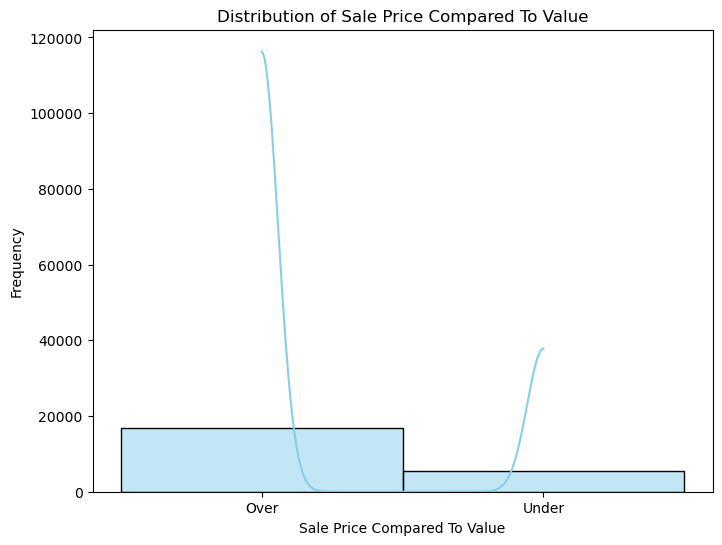

In [45]:
# Explore the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(data['Sale Price Compared To Value'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sale Price Compared To Value')
plt.xlabel('Sale Price Compared To Value')
plt.ylabel('Frequency')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


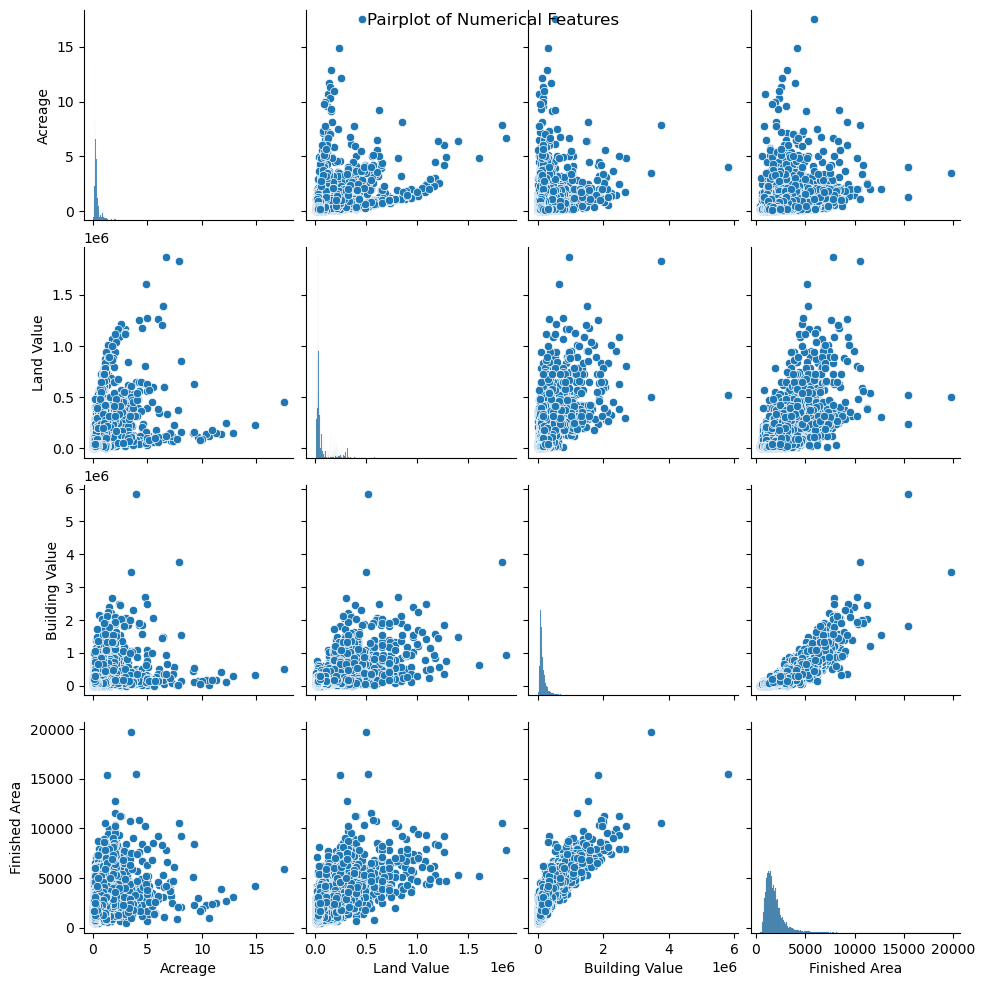

In [46]:
# Explore relationships between numerical features
sns.pairplot(data[['Acreage', 'Land Value', 'Building Value', 'Finished Area']])
plt.suptitle('Pairplot of Numerical Features')
plt.show()

In [48]:
# Selecting all numeric columns
numeric_columns = data.select_dtypes(include=['number'])

# Building a correlation matrix
correlation_matrix_all = numeric_columns.corr()
correlation_matrix_all

,Acreage,Neighborhood,Land Value,Building Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath,Sale Year
Acreage,1.000000,0.320602,0.409815,0.272009,0.402194,0.054791,0.203695,0.289586,0.080886,-0.000358
Neighborhood,0.320602,1.000000,0.191070,0.078210,0.189806,0.145836,0.107435,0.144233,0.014261,0.013282
Land Value,0.409815,0.191070,1.000000,0.610930,0.658679,-0.011243,0.345720,0.544162,0.191681,-0.048557
Building Value,0.272009,0.078210,0.610930,1.000000,0.845565,0.206527,0.449213,0.649558,0.384671,-0.049504
Finished Area,0.402194,0.189806,0.658679,0.845565,1.000000,0.223191,0.609778,0.775678,0.368524,-0.044330
Year Built,0.054791,0.145836,-0.011243,0.206527,0.223191,1.000000,0.193749,0.295513,0.237680,0.019687
Bedrooms,0.203695,0.107435,0.345720,0.449213,0.609778,0.193749,1.000000,0.609908,0.212801,-0.025624
Full Bath,0.289586,0.144233,0.544162,0.649558,0.775678,0.295513,0.609908,1.000000,0.091851,-0.041361
Half Bath,0.080886,0.014261,0.191681,0.384671,0.368524,0.237680,0.212801,0.091851,1.000000,-0.013745
Sale Year,-0.000358,0.013282,-0.048557,-0.049504,-0.044330,0.019687,-0.025624,-0.041361,-0.013745,1.000000


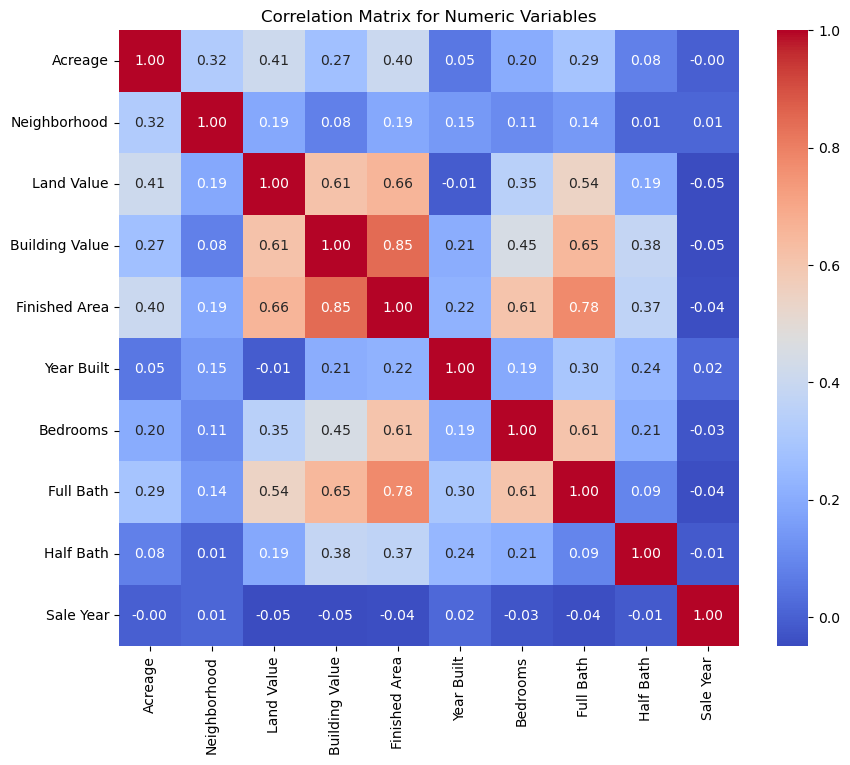

In [49]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numeric Variables')
plt.show()

In [90]:
# Display the first few rows of the dataset
print(data.head())

        Land Use   Property Address Property City   Sale Date Sold As Vacant  \
0  SINGLE FAMILY   1802  STEWART PL     NASHVILLE  2013-01-11             No   
1  SINGLE FAMILY  2761  ROSEDALE PL     NASHVILLE  2013-01-18             No   
2  SINGLE FAMILY  224  PEACHTREE ST     NASHVILLE  2013-01-18             No   
3  SINGLE FAMILY      316  LUTIE ST     NASHVILLE  2013-01-23             No   
4  SINGLE FAMILY   2626  FOSTER AVE     NASHVILLE  2013-01-04             No   

  Multiple Parcels Involved in Sale       City State  Acreage  \
0                                No  NASHVILLE    TN     0.17   
1                                No  NASHVILLE    TN     0.11   
2                                No  NASHVILLE    TN     0.17   
3                                No  NASHVILLE    TN     0.34   
4                                No  NASHVILLE    TN     0.17   

              Tax District  ...  Finished Area  Foundation Type  Year Built  \
0  URBAN SERVICES DISTRICT  ...     1149.00000   

In [102]:
#LOGISTIC MODEL WITH SELECTED VARIABLES 
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm

features = ['Acreage', 'Land Value', 'Building Value', 'Finished Area', 'Age', 'Bedrooms', 'Full Bath', 'Half Bath', 'Sale Year']
target = 'Sale Price Compared To Value'

# Create the feature matrix (X) and target vector (y)
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train1, y_train1)

# Make predictions on the test set
y_pred1 = model.predict(X_test1)

# Evaluate the model
accuracy = accuracy_score(y_test1, y_pred1)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test1, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test1, y_pred1))


Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

        Over       0.75      1.00      0.85      3337
       Under       0.48      0.01      0.02      1145

    accuracy                           0.74      4482
   macro avg       0.61      0.50      0.44      4482
weighted avg       0.68      0.74      0.64      4482

Confusion Matrix:
 [[3322   15]
 [1131   14]]


In [ ]:
import pandas as pd

# Assuming your dataframe is named 'data'
# Create a new variable 'Age' by subtracting 'Year Built' from the current year
data['Age'] = pd.to_datetime('now').year - data['Year Built']

# Now 'Age' represents the age of the building

In [101]:
#DECISION TREES 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

features = ['Acreage', 'Land Value', 'Building Value', 'Finished Area', 'Age', 'Bedrooms', 'Full Bath', 'Half Bath', 'Sale Year']
target = 'Sale Price Compared To Value'

# Create the feature matrix (X) and target vector (y)
X = data[features]
y = data[target] 
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("Decision Tree Model Results:")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Decision Tree Model Results:
Accuracy: 0.7001338688085676

Confusion Matrix:
 [[2692  645]
 [ 699  446]]

Classification Report:
               precision    recall  f1-score   support

        Over       0.79      0.81      0.80      3337
       Under       0.41      0.39      0.40      1145

    accuracy                           0.70      4482
   macro avg       0.60      0.60      0.60      4482
weighted avg       0.70      0.70      0.70      4482



In [103]:
#RANDOM FOREST 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

features = ['Acreage', 'Land Value', 'Building Value', 'Finished Area', 'Age', 'Bedrooms', 'Full Bath', 'Half Bath', 'Sale Year']
target = 'Sale Price Compared To Value'

# Create the feature matrix (X) and target vector (y)
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("Random Forest Model Results:")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Random Forest Model Results:
Accuracy: 0.7588130298973672

Confusion Matrix:
 [[3070  267]
 [ 814  331]]

Classification Report:
               precision    recall  f1-score   support

        Over       0.79      0.92      0.85      3337
       Under       0.55      0.29      0.38      1145

    accuracy                           0.76      4482
   macro avg       0.67      0.60      0.62      4482
weighted avg       0.73      0.76      0.73      4482



In [104]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

features = ['Acreage', 'Land Value', 'Building Value', 'Finished Area', 'Age', 'Bedrooms', 'Full Bath', 'Half Bath', 'Sale Year']
target = 'Sale Price Compared To Value'

# Create the feature matrix (X) and target vector (y)
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting model
gradient_boost_model = GradientBoostingClassifier(random_state=42)

# Train the model
gradient_boost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gradient_boost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("Gradient Boosting Model Results:")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Gradient Boosting Model Results:
Accuracy: 0.7699687639446675

Confusion Matrix:
 [[3232  105]
 [ 926  219]]

Classification Report:
               precision    recall  f1-score   support

        Over       0.78      0.97      0.86      3337
       Under       0.68      0.19      0.30      1145

    accuracy                           0.77      4482
   macro avg       0.73      0.58      0.58      4482
weighted avg       0.75      0.77      0.72      4482



In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

features = ['Acreage', 'Land Value', 'Building Value', 'Finished Area', 'Age', 'Bedrooms', 'Full Bath', 'Half Bath', 'Sale Year']
target = 'Sale Price Compared To Value'

# Create the feature matrix (X) and target vector (y)
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
logistic_model = LogisticRegression(random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

# Train models
logistic_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Make predictions
logistic_preds = logistic_model.predict(X_test)
decision_tree_preds = decision_tree_model.predict(X_test)
random_forest_preds = random_forest_model.predict(X_test)

# Evaluate models
logistic_report = classification_report(y_test, logistic_preds, output_dict=True)
decision_tree_report = classification_report(y_test, decision_tree_preds, output_dict=True)
random_forest_report = classification_report(y_test, random_forest_preds, output_dict=True)

# Create a DataFrame for comparison
models_comparison = pd.DataFrame({
    'Logistic Regression': logistic_report['weighted avg'],
    'Decision Trees': decision_tree_report['weighted avg'],
    'Random Forest': random_forest_report['weighted avg']
})

# Display the comparison table
print(models_comparison)


           Logistic Regression  Decision Trees  Random Forest
precision             0.678761        0.695495       0.729900
recall                0.744311        0.700134       0.758813
f1-score              0.641097        0.697716       0.730103
support            4482.000000     4482.000000    4482.000000


In [109]:
features = ['Acreage', 'Land Value', 'Building Value', 'Finished Area', 'Age', 'Bedrooms', 'Full Bath', 'Half Bath', 'Sale Year']
target = 'Sale Price Compared To Value'

# Create the feature matrix (X) and target vector (y)
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
logistic_model = LogisticRegression(random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

# Train models
logistic_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Make predictions
logistic_preds = logistic_model.predict(X_test)
decision_tree_preds = decision_tree_model.predict(X_test)
random_forest_preds = random_forest_model.predict(X_test)

# Evaluate models
logistic_accuracy = accuracy_score(y_test, logistic_preds)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_preds)
random_forest_accuracy = accuracy_score(y_test, random_forest_preds)

logistic_precision = precision_score(y_test, logistic_preds, pos_label='Over')
decision_tree_precision = precision_score(y_test, decision_tree_preds, pos_label='Over')
random_forest_precision = precision_score(y_test, random_forest_preds, pos_label='Over')

logistic_recall = recall_score(y_test, logistic_preds, pos_label='Over')
decision_tree_recall = recall_score(y_test, decision_tree_preds, pos_label='Over')
random_forest_recall = recall_score(y_test, random_forest_preds, pos_label='Over')

logistic_f1 = f1_score(y_test, logistic_preds, pos_label='Over')
decision_tree_f1 = f1_score(y_test, decision_tree_preds, pos_label='Over')
random_forest_f1 = f1_score(y_test, random_forest_preds, pos_label='Over')

# Create a DataFrame for comparison
models_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Trees', 'Random Forest'],
    'Accuracy': [logistic_accuracy, decision_tree_accuracy, random_forest_accuracy],
    'Precision': [logistic_precision, decision_tree_precision, random_forest_precision],
    'Recall': [logistic_recall, decision_tree_recall, random_forest_recall],
    'F1-Score': [logistic_f1, decision_tree_f1, random_forest_f1]
})

# Round the values to three decimals
models_comparison_rounded = models_comparison.round({'Accuracy': 3, 'Precision': 3, 'Recall': 3, 'F1-Score': 3})

# Display the rounded comparison table
print(models_comparison_rounded)


                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression     0.744      0.746   0.996     0.853
1       Decision Trees     0.700      0.794   0.807     0.800
2        Random Forest     0.759      0.790   0.920     0.850


In [110]:
# Get feature importances from the Random Forest model
importances = random_forest_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Feature Importances:")
print(feature_importance_df)


Feature Importances:
          Feature  Importance
2  Building Value    0.192114
3   Finished Area    0.176975
4             Age    0.159238
0         Acreage    0.139838
1      Land Value    0.132719
8       Sale Year    0.114888
5        Bedrooms    0.035333
6       Full Bath    0.029571
7       Half Bath    0.019324


In [111]:
pwd

'C:\\Users\\sreej'